In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df[df['Fare'] > 100]['Survived'].value_counts()

1    39
0    14
Name: Survived, dtype: int64

In [11]:
39/(39+14)

0.7358490566037735

In [22]:
len(df[(df['Survived'] == 1) & (df['Fare'] > 100)])

39

In [23]:
len(df[df['Fare'] > 100])

53

In [24]:
39/53

0.7358490566037735

In [27]:
df[df['Survived'] == 1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [28]:
109 / (109+233)

0.31871345029239767

In [29]:
df[(df['Age'] < 30) & (df['Age'] > 20)]['Pclass'].value_counts()

3    118
2     53
1     34
Name: Pclass, dtype: int64

In [30]:
34/(34+53+118)

0.16585365853658537

In [31]:
df[(df['Sex'] == "female" & (df['']))]

KeyError: ''

In [39]:
fare_list = df[(df['Sex'] == 'male') & (df['Age'] > 30) & (df['Survived'] == 0)]

In [43]:
len(fare_list[fare_list['Fare'] < 35]['Fare'])

132

In [44]:
|

SyntaxError: invalid syntax (<ipython-input-44-4b37ef281455>, line 1)

In [45]:
df = pd.read_csv('tennis.txt', delimiter="\t", header=None, names=['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'])

In [46]:
df

,Outlook,Temp,Humidity,Wind,Decision
1,Sunny,Hot,High,Weak,No
2,Sunny,Hot,High,Strong,No
3,Overcast,Hot,High,Weak,Yes
4,Rain,Mild,High,Weak,Yes
5,Rain,Cool,Normal,Weak,Yes
6,Rain,Cool,Normal,Strong,No
7,Overcast,Cool,Normal,Strong,Yes
8,Sunny,Mild,High,Weak,No
9,Sunny,Cool,Normal,Weak,Yes
10,Rain,Mild,Normal,Weak,Yes


In [82]:
s = df[df['Decision'] == 'Yes']['Wind'].value_counts()

In [90]:
for item in s.keys():
    print(item)

Weak
Strong


In [50]:
6/9

0.6666666666666666

In [102]:

df[df['Wind'] == 'Weak']['Decision'].value_counts().sum()

8

In [52]:
6/8

0.75

In [92]:
#Needs to return the chance of player playing given a certain condition
def func(df, c_column, c_value, d_column):
    s = df[df[c_column] == c_value][d_column].value_counts()
    num_yes = s['Yes']
    num_total = s['Yes'] + s['No']
    
    print(s)
    decisions = {}
    for item in s.keys():
        if item not in decisions:
            decisions[item] = 1
        else:
            decisions[item] += 1
            
#     return (num_yes/num_total) * 100
    return decisions 
    
out = func(df, 'Temp', 'Mild', 'Decision')
print("{}%".format(out))

Yes    4
No     2
Name: Decision, dtype: int64
{'Yes': 1, 'No': 1}%


In [106]:
#Needs to return the chance of player playing given a certain condition
def func(df, c_column, c_value, d_column):
    s = df[df[c_column] == c_value][d_column].value_counts()

    out = {}
    for i in s.items():
        out[i[0]] = i[1]/s.sum()
    
    return out
    
out = func(df, 'Wind', 'Weak', 'Decision')
print("{}".format(out))

{'Yes': 0.75, 'No': 0.25}


In [81]:
def func(c_column, c_value, d_column):
    df1 = pd.DataFrame(c_column)
    df2 = pd.DataFrame(d_column)
    
    df = pd.concat([df1, df2], axis=1)

    s = df[df[df.columns.values[0]] == c_value][df.columns.values[1]].value_counts()

    

    return (num_yes/num_total) * 100
    
out = func(df['Wind'], 'Weak', df['Decision'])
print("{}%".format(out))

75.0%


In [110]:
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython import display
import seaborn as sns
import csv

In [164]:
df = pd.read_csv('startup.csv')

In [165]:
df.head()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
0,H2O.ai,Software,33.600000,operating,USA,CA,Mountain View,4.0,Capital One:20000000|Nexus Venture Partners:33...,11.0,-,-,-,-,-,-,-,Santa Clara,2011,37.399364:-122.079517
1,One Inc.,Mobile,1.150050,operating,USA,CA,San Francisco,3.0,Camp One Ventures:150000|CRV:1000050|General C...,12.0,-,-,-,-,-,-,-,San Francisco,2011,37.727239:-123.032229
2,1000 Corks,Software,0.040000,operating,USA,OR,Lake Oswego,1.0,Start-Up Chile:40000,1.0,-,-,-,-,-,-,-,Clackamas,2008,45.412305:-122.699154
3,1000museums.com,Software,6.795451,operating,USA,MA,Lenox,9.0,Alliance of Angels:1289879.0|Converge Venture ...,7.0,-,-,-,-,-,-,-,Berkshire,2008,42.361228:-73.286788
4,Redox,Health,4.000000,operating,USA,WI,Madison,2.0,.406 Ventures:3530000|DreamIt Ventures:470000|...,6.0,-,-,-,-,-,-,-,Dane,2014,43.087806:-89.430121


In [189]:
df[(df['founded_at'] == '2008') & (df['category_list'] == 'Software') & (df['city'] == 'San Francisco')].sort_values('funding_total_usd', ascending=False)

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
771,AppDynamics,Software,364.500000,operating,USA,CA,San Francisco,7.0,Adage Capital Management:158000000|Altimeter C...,16.0,-,-,-,-,-,-,-,San Francisco,2008,40.664274:-73.9385
4831,GitHub,Software,350.000000,operating,USA,CA,San Francisco,2.0,Andreessen Horowitz:350000000.0|IVP:250000000|...,5.0,-,-,-,-,-,-,-,San Francisco,2008,42.383037:-83.102237
12090,Thumbtack,Software,273.200000,operating,USA,CA,San Francisco,6.0,Baillie Gifford:125000000|Draper Associates:45...,21.0,-,-,-,-,-,-,-,San Francisco,2008,37.866702:-122.299066
12437,Twilio,Software,233.700000,operating,USA,CA,San Francisco,6.0,500 Startups:12000000|Altimeter Capital:130000...,23.0,-,-,-,-,-,-,-,San Francisco,2008,40.664274:-73.9385
7986,New Relic,Software,214.500000,ipo,USA,CA,San Francisco,6.0,Allen & Company:105000000.0|Benchmark:11450000...,14.0,-,-,-,-,-,-,-,San Francisco,2008,42.375967:-71.118275
12099,Ticketfly,Software,87.000000,acquired,USA,CA,San Francisco,6.0,Contour Venture Partners:15000000.0|Cross Cree...,10.0,Pandora Media,Broadcasting|Music|Video Streaming,USA,CA,Oakland,450000000,USD,San Francisco,2008,40.664274:-73.9385
6637,Life360,Software,76.100000,operating,USA,CA,San Francisco,9.0,500 Startups:15500000.0|ADT Security:50000000|...,24.0,-,-,-,-,-,-,-,San Francisco,2008,42.33196:-71.020173
7318,Message Systems,Software,72.999998,operating,USA,CA,San Francisco,4.0,Hercules Technology Growth Capital:35000000.0|...,3.0,-,-,-,-,-,-,-,San Francisco,2008,33.572162:-112.087966
6382,Klout,Software,40.000000,acquired,USA,CA,San Francisco,10.0,CrunchFund:30000000|ff Venture Capital:4000000...,21.0,Lithium Technologies,Social CRM|Software,USA,CA,San Francisco,200000000,USD,San Francisco,2008,37.399782:-122.142776
11786,TaskRabbit,Software,37.675000,operating,USA,CA,San Francisco,6.0,500 Startups:18000000.0|Allen & Company:178000...,13.0,-,-,-,-,-,-,-,San Francisco,2008,28.415886:-81.29875


In [116]:
len(df)

13732

In [117]:
df = df.dropna()

In [118]:
len(df)

13712

In [154]:
df = df[df['category_list'] == "Software"]

In [155]:
date_group = df.groupby('founded_at')['funding_total_usd'].value_counts().unstack()

In [156]:
for row in date_group.iterrows():
    print(row)

('1-Jan', funding_total_usd
0.010000       NaN
0.011000       NaN
0.012000       NaN
0.012500       NaN
0.013200       NaN
                ..
1315.500000    NaN
1671.557162    NaN
1729.000000    NaN
5820.000000    NaN
30079.503000   NaN
Name: 1-Jan, Length: 2125, dtype: float64)
('1924', funding_total_usd
0.010000       NaN
0.011000       NaN
0.012000       NaN
0.012500       NaN
0.013200       NaN
                ..
1315.500000    NaN
1671.557162    NaN
1729.000000    NaN
5820.000000    NaN
30079.503000   NaN
Name: 1924, Length: 2125, dtype: float64)
('1944', funding_total_usd
0.010000       NaN
0.011000       NaN
0.012000       NaN
0.012500       NaN
0.013200       NaN
                ..
1315.500000    NaN
1671.557162    NaN
1729.000000    NaN
5820.000000    NaN
30079.503000   NaN
Name: 1944, Length: 2125, dtype: float64)
('1947', funding_total_usd
0.010000       NaN
0.011000       NaN
0.012000       NaN
0.012500       NaN
0.013200       NaN
                ..
1315.500000    NaN
1671

In [157]:
date_list = list(df['founded_at'].sort_values().unique())

In [158]:
sum_by_date = []

for date in date_list:
    sum_by_date.append(df[df['founded_at'] == date]['funding_total_usd'].sum())
    
sum_by_date

[68.0,
 35.0,
 5.0,
 10.0,
 11.4,
 0.5,
 6.0,
 10.0,
 4.5,
 25.0,
 13.0,
 2.5726,
 12.0,
 0.75,
 330.2,
 288.3,
 1030.5,
 104.0,
 346.0,
 30127.201999999997,
 200.26204800000002,
 101.729971,
 236.38709300000002,
 66.680511,
 114.068238,
 246.649674,
 190.7,
 344.546725,
 157.02749999999997,
 123.93339999999999,
 284.2,
 722.272222,
 1218.3065430000001,
 1403.4045914199999,
 2995.954001399,
 6851.748235581001,
 5274.368905,
 3170.162111884,
 3520.6371440000003,
 9759.921296249999,
 8078.887584,
 6230.730723000001,
 6664.218580000001,
 8051.633184,
 8089.574015,
 9883.793102,
 6659.123789,
 8531.500703976,
 8183.62137026,
 4727.556383104,
 1324.721404466,
 159.1]

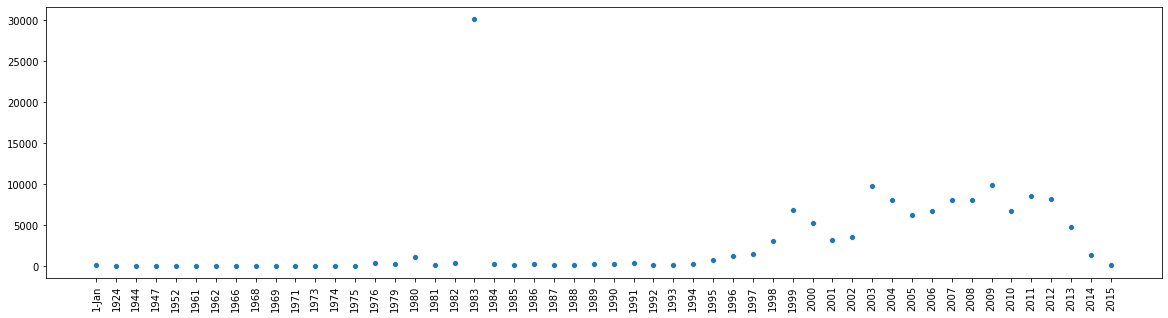

In [159]:
plt.figure(figsize=(20, 5), frameon=False)
plt.xticks(rotation=90)
sns.scatterplot(x = list(df['founded_at'].sort_values().unique()), y = sum_by_date)

In [119]:
sorted_by_date = df.sort_values(by="founded_at")

In [126]:
software_df = sorted_by_date[sorted_by_date['category_list'] == 'Software']

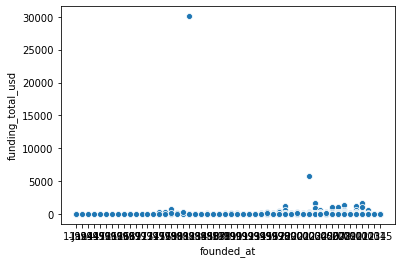

In [127]:
sns.scatterplot(x='founded_at', y='funding_total_usd', data=software_df)